In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from scipy import io

In [2]:
path1 = 'C:/Users/Borod/Research/A. Matlab Programs/hBN project/programs2/Contrast2.mat'
data1 = io.loadmat(path1)
data1 = data1['AllCon']
RGB_data = data1[0:3, :]
label_data = data1[4, :]

In [3]:
# RGB_data = np.hstack((RGB_data, [[np.inf],[np.inf],[np.inf]]))
# label_data = np.hstack((label_data, [2.]))
index = []
for i in range(len(RGB_data[0])):
    if np.sum( np.isinf(RGB_data[:,i])!=0 ) != 0:
        index.append(i)
        

if len(index) != 0:
    print('There are inf data, #: ', len(index))
    for i in sorted(index, reverse=True):
        RGB_data = np.delete(RGB_data, i, 1)
        label_data = np.delete(label_data, i)
else:
    print('There is no inf data')

There is no inf data


In [4]:
RGB_data = np.transpose(RGB_data)
train_data, test_data, train_label, test_label = train_test_split(RGB_data, label_data, random_state=1, train_size = 0.7, test_size = 0.3)

In [5]:
svm_model = svm.SVC(C=1, kernel='rbf', gamma=5, decision_function_shape='ovr')
svm_model.fit(train_data, train_label)

SVC(C=1, gamma=5)

In [6]:
print('TrainCase Score: ', svm_model.score(train_data, train_label))
print('TestCase Score: ', svm_model.score(test_data, test_label))

TrainCase Score:  0.9222382354784134
TestCase Score:  0.9200292397660819


In [7]:
R_min, R_max = RGB_data[:,0].min(), RGB_data[:,0].max()
G_min, G_max = RGB_data[:,1].min(), RGB_data[:,1].max()
B_min, B_max = RGB_data[:,2].min(), RGB_data[:,2].max()
R_ = np.linspace(R_min, R_max, 50)
G_ = np.linspace(G_min, G_max, 50)
B_ = np.linspace(B_min, B_max, 50)
Rs, Gs, Bs = np.meshgrid(R_, G_, B_, indexing='ij')
assert np.all(Rs[:,0,0] == R_)
assert np.all(Gs[0,:,0] == G_)
assert np.all(Bs[0,0,:] == B_)

In [8]:
grid_test = np.stack((Rs.flat, Gs.flat, Bs.flat), axis=1)

In [9]:
grid_hat = svm_model.predict(grid_test)
grid_hat = grid_hat.reshape(Rs.shape)

In [10]:
from scipy.io import savemat
mdic1 = {"Rs": Rs, "Gs" : Gs, "Bs" : Bs, "grid_hat" : grid_hat, "RGB_data" : RGB_data, "label_data" : label_data}
savemat("C:/Users/Borod/Research/A. Matlab Programs/hBN project//programs2/SVM_results.mat", mdic1)

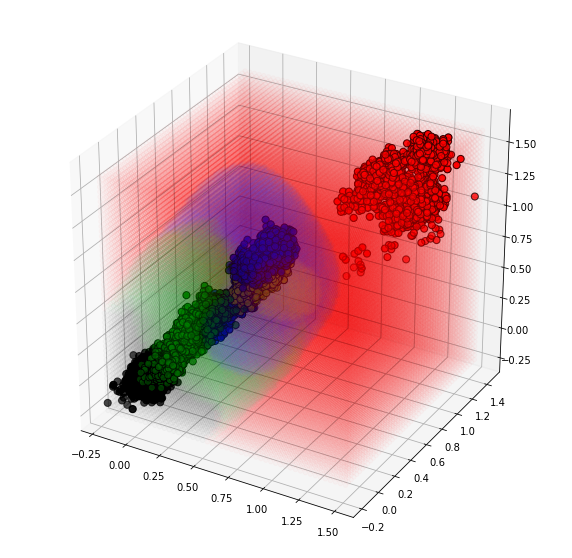

In [11]:
# %matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
cm_light = mpl.colors.ListedColormap(['black', 'g', 'b', 'y', 'r'])
# cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
ax.scatter3D(Rs, Gs, Bs, c = grid_hat, cmap=cm_light, alpha=0.02)
ax.scatter3D(RGB_data[:, 0], RGB_data[:, 1], RGB_data[:, 2], c=label_data, edgecolors='k', s=50, cmap=cm_light, zorder=2)
plt.show()

This is the prediction part.

In [13]:
import joblib
joblib.dump(svm_model, 'C:/Users/Borod/Research/A. Matlab Programs/hBN project/programs2/svm_model.m')

['C:/Users/Borod/Research/A. Matlab Programs/hBN project/programs2/svm_model.m']

In [13]:
import joblib
from scipy import io
import numpy as np
from scipy.io import savemat

In [14]:
a = 'C:/Users/Borod/Research/A. Matlab Programs/hBN project/programs2/'
svm_model1 = joblib.load(a+'svm_model.m')

In [15]:
path2 = 'C:/Users/Borod/Research/A. Matlab Programs/hBN project/programs2/im2_con.mat'
data2 = io.loadmat(path2)
data2 = data2['im2_con']

In [16]:
data2 = data2[0, :, :]
PreResult = svm_model1.predict(data2)

In [17]:
DrawResult = data2
for i in range(len(DrawResult)):
    if PreResult[i] == 0:
        DrawResult[i, :] = [0, 255, 0] #Green for Background
    elif PreResult[i] == 1:
        DrawResult[i, :] = [0, 0, 255] #Blue for Thin
    else:
        DrawResult[i, :] = [255, 0, 0] #Red for Bulk

In [18]:
DrawResult = data2
for i in range(len(DrawResult)):
    if PreResult[i] == 0:
        DrawResult[i, :] = [0, 0, 0] #Black for Background
    elif PreResult[i] == 1:
        DrawResult[i, :] = [0, 255, 0] #Green for Thin
    elif PreResult[i] == 2:
        DrawResult[i, :] = [0, 0, 255] #Blue for Bulk
    elif PreResult[i] == 3:
        DrawResult[i, :] = [255, 255, 0] #Yellow for Bulk
    elif PreResult[i] == 4:
        DrawResult[i, :] = [255, 0, 0] #Red for Bulk

In [19]:
DrawResult = np.array([DrawResult])
savemat("C:/Users/Borod/Research/A. Matlab Programs/hBN project/programs2/DrawResult.mat", {'DrawResult' : DrawResult})